# Unit 5 - Financial Planning

## Part 1 - Personal Finance Planner

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $44840.40
The current value of your 5.3 ETH is $10673.78


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [8]:
# Format current date as ISO format
start = pd.Timestamp("2022-11-18", tz="America/Chicago").isoformat()
end = pd.Timestamp("2023-11-18", tz="America/Chicago").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                      \
                           close     high     low trade_count   open   
timestamp                                                              
2022-11-21 05:00:00+00:00  96.94  97.3355  96.910       22685  97.27   
2022-11-22 05:00:00+00:00  97.44  97.5000  97.180       26245  97.18   
2022-11-23 05:00:00+00:00  98.02  98.0200  97.580       27491  97.58   
2022-11-25 05:00:00+00:00  98.04  98.0400  97.810       11068  97.81   
2022-11-28 05:00:00+00:00  97.88  98.1900  97.835       33274  98.14   
...                          ...      ...     ...         ...    ...   
2023-11-13 05:00:00+00:00  93.95  93.9700  93.530       34348  93.64   
2023-11-14 05:00:00+00:00  95.13  95.2000  94.930       33879  95.03   
2023-11-15 05:00:00+00:00  94.54  94.7150  94.455       37883  94.70   
2023-11-16 05:00:00+00:00  95.06  95.1979  94.850       29419  94.85   
2023-11-17 05:00:00+00:00  95.25  95.3600  95.025       27266  95.21   

                                                   SPY                    \
                             volume       vwap   close    high       low   
timestamp                                                                  
2022-11-21 05:00:00+00:00   6829111  97.034762  394.59  395.82  392.6600   
2022-11-22 05:00:00+00:00   8039011  97.392306  399.90  400.07  395.1527   
2022-11-23 05:00:00+00:00   5885623  97.849754  402.42  402.93  399.3100   
2022-11-25 05:00:00+00:00   2718602  97.944018  402.33  402.91  401.5350   
2022-11-28 05:00:00+00:00   7920752  97.951584  395.91  400.81  395.1100   
...                             ...        ...     ...     ...       ...   
2023-11-13 05:00:00+00:00   9679644  93.790288  440.19  441.33  438.4200   
2023-11-14 05:00:00+00:00  12149610  95.054442  448.73  450.06  446.0900   
2023-11-15 05:00:00+00:00  10956776  94.565861  449.68  451.38  448.8000   
2023-11-16 05:00:00+00:00  10145390  95.078054  450.23  450.56  448.1200   
2023-11-17 05:00:00+00:00   9244030  95.213371  450.79  451.42  449.2900   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2022-11-21 05:00:00+00:00      401650  394.64  51243189  394.533242  
2022-11-22 05:00:00+00:00      416891  396.63  60429025  398.237458  
2022-11-23 05:00:00+00:00      476626  399.55  68261628  401.583806  
2022-11-25 05:00:00+00:00      184647  401.83  30545434  402.272977  
2022-11-28 05:00:00+00:00      441562  399.09  68021749  397.879662  
...                               ...     ...       ...         ...  
2023-11-13 05:00:00+00:00      406682  439.23  52236070  440.094647  
2023-11-14 05:00:00+00:00      653304  446.32  97176937  447.870072  
2023-11-15 05:00:00+00:00      555373  450.11  77327573  450.019504  
2023-11-16 05:00:00+00:00      507746  449.22  66665799  449.474655  
2023-11-17 05:00:00+00:00      439332  450.24  83183079  450.530471  

[250 rows x 14 columns]

In [9]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][0]
spy_close_price = df_portfolio["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $96.94
Current SPY closing price: $394.59


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19729.50
The current value of your 200 AGG shares is $19388.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_crypto_amount = my_btc_value + my_eth_value
total_shares_amount = my_spy_value + my_agg_value

# Create savings DataFrame(source:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)
df_savings = pd.DataFrame({'amount' : [total_crypto_amount, total_shares_amount]}, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,55514.176
shares,39117.500


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

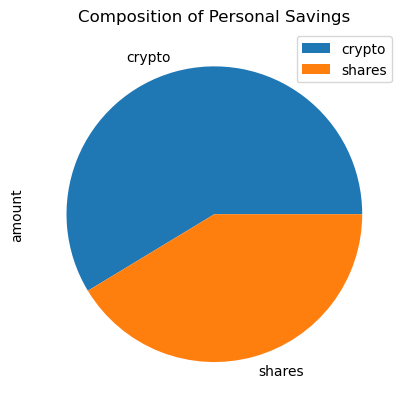

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount', title = 'Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings_amount = total_crypto_amount + total_shares_amount

# Validate saving health
if total_savings_amount > emergency_fund:
    print(f'Congratulations for having enough money in this fund!')
elif total_savings_amount == emergency_fund:
    print(f'Congratulations on reaching this financial goal!')
elif total_savings_amount < emergency_fund:
    print(f'You are $(emergency fund - current savings) away from reaching this financial goal')

Congratulations for having enough money in this fund!


In [14]:
#Use if conditional statements to validate if the current savings are enough for an emergency fund. An ideal emergency fund should be equal to three times your monthly income.

#If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.

#If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.

#If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [15]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-11-18', tz='America/Chicago').isoformat()
end_date = pd.Timestamp('2023-11-18', tz='America/Chicago').isoformat()

In [16]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])

# Display sample data
df_stock_data.head()

SPY                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2018-11-19 05:00:00+00:00  269.12  273.3800  268.07      492976  273.05   
2018-11-20 05:00:00+00:00  264.15  267.0000  263.15      666892  265.36   
2018-11-21 05:00:00+00:00  265.03  267.1500  265.01      347443  265.86   
2018-11-23 05:00:00+00:00  263.32  264.8234  263.07      190709  263.18   
2018-11-26 05:00:00+00:00  267.43  267.7500  265.34      341212  265.78   

                                                     AGG                    \
                              volume        vwap   close      high     low   
timestamp                                                                    
2018-11-19 05:00:00+00:00  104845636  269.922035  104.65  104.7299  104.61   
2018-11-20 05:00:00+00:00  137953946  265.195482  104.61  104.7200  104.61   
2018-11-21 05:00:00+00:00   77283500  265.829729  104.67  104.6900  104.58   
2018-11-23 05:00:00+00:00   44012132  263.921432  104.65  104.8400  104.65   
2018-11-26 05:00:00+00:00   81413911  266.566378  104.63  104.6700  104.59   

                                                                    
                          trade_count    open   volume        vwap  
timestamp                                                           
2018-11-19 05:00:00+00:00       12499  104.61  5002416  104.669666  
2018-11-20 05:00:00+00:00       12627  104.67  3348454  104.652930  
2018-11-21 05:00:00+00:00       14025  104.60  5886673  104.638034  
2018-11-23 05:00:00+00:00        5751  104.84  1801343  104.713743  
2018-11-26 05:00:00+00:00       11867  104.67  4992135  104.628152

In [17]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30)
    

In [18]:
# Printing the simulation input data
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30)

In [19]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.985703,0.997422,1.004262,1.006854,1.005436,0.995004,0.996331,0.998326,0.994524,1.012099,...,1.012496,1.004092,0.989139,1.004136,0.989449,0.998124,0.988020,1.004974,1.001088,1.002250
2,0.996596,0.999699,0.991277,0.999292,1.022223,0.999275,0.998523,0.978089,0.994542,1.009409,...,0.996875,1.007063,0.997840,1.020193,0.987371,0.994481,0.990985,1.002850,0.999676,1.018658
3,1.011423,0.996281,0.997332,1.008230,1.023299,1.019514,0.990945,0.977293,0.994888,1.014345,...,1.010242,0.988124,0.984634,1.021029,0.989836,1.008803,0.984469,0.992323,0.983727,1.025341
4,1.006020,0.986226,1.013210,1.008491,1.011680,1.041170,0.982869,0.978751,0.999004,1.015669,...,1.012280,0.978609,0.986352,1.031758,0.998532,1.006278,0.977452,0.998214,0.984511,1.022396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.491191,8.326919,2.689095,4.872924,3.546495,12.810859,15.388144,3.595288,17.205947,7.861489,...,21.244141,6.787563,3.404100,1.709211,9.360697,1.806708,7.534282,7.491934,3.493340,7.484442
7557,7.423332,8.300479,2.669307,4.894507,3.577650,12.794084,15.458178,3.582373,17.093318,7.888932,...,21.320038,6.935271,3.377876,1.714716,9.200323,1.798050,7.594319,7.592221,3.548069,7.434582
7558,7.369651,8.364879,2.667289,4.943944,3.542740,12.900747,15.648613,3.575037,16.950840,7.789069,...,21.466891,6.975309,3.351380,1.690234,9.250185,1.780329,7.619372,7.611794,3.543642,7.321138
7559,7.378871,8.400569,2.665434,5.007574,3.593442,12.737441,15.833120,3.571566,16.845735,7.804082,...,21.285003,6.952312,3.379813,1.684579,9.131152,1.783905,7.564775,7.605396,3.489203,7.426471


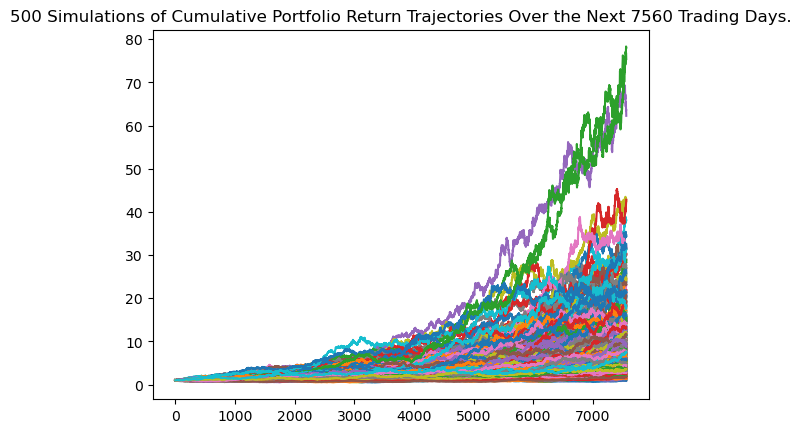

In [20]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation()

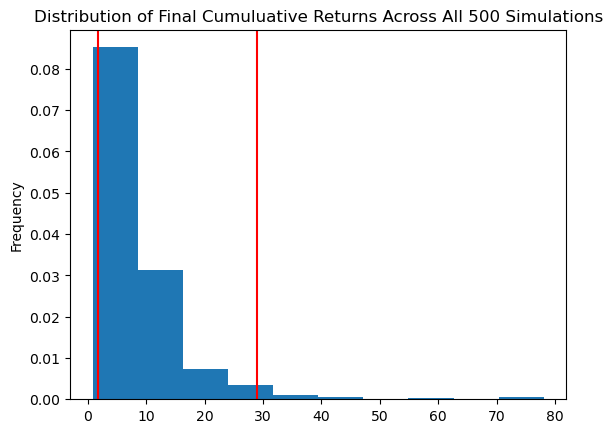

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

### Retirement Analysis

In [26]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [27]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

NameError: name 'even_tbl' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [28]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower = round(even_tbl[8]*initial_investment,2)
even_ci_upper = round(even_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}")

NameError: name 'even_tbl' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")